In [147]:
import os
import glob
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline


Gather all 5 data files into one dataframe

In [28]:
path = r'/home/markryman/Documents/gal/capstone1/December-Ski-Conditions/data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all5yrsdf = pd.concat(li, axis=0, ignore_index=True)


In [29]:

print(all5yrsdf.shape)


(43299, 7)


In [30]:
all5yrsdf.memory_usage()

Index                       128
Date/Time (PST)          346392
Battery Voltage (v)      346392
Temperature (deg F)      346392
Relative Humidity (%)    346392
Precipitation (")        346392
Total Snow Depth (")     346392
24 Hour Snow (")         346392
dtype: int64

In [31]:
all5yrsdf.dtypes

Date/Time (PST)           object
Battery Voltage (v)      float64
Temperature (deg F)      float64
Relative Humidity (%)    float64
Precipitation (")        float64
Total Snow Depth (")     float64
24 Hour Snow (")         float64
dtype: object

In [32]:
all5yrsdf['Temperature (deg F)'].describe()

count    43289.000000
mean        42.313870
std         14.022337
min          0.121000
25%         32.440000
50%         40.300000
75%         51.170000
max         95.300000
Name: Temperature (deg F), dtype: float64

In [33]:
all5yrsdf['Date/Time (PST)'].describe()

count                43299
unique               43299
top       2019-12-03 10:00
freq                     1
Name: Date/Time (PST), dtype: object

In [34]:
all5yrsdf.columns = all5yrsdf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
all5yrsdf = all5yrsdf.rename(columns={'date/time_pst': 'dt_time_pst','relative_humidity_%':'rel_humidity_percent', 'precipitation_"': 'precip', 'total_snow_depth_"': 'total_snow_depth', '24_hour_snow_"': '24_hr_snow'})

In [35]:
all5yrs_sorted_df = all5yrsdf.sort_values('dt_time_pst')
#all5yrs_sorted_df

In [36]:
all5yrs_dtdf = all5yrs_sorted_df.copy(deep=True)
all5yrs_dtdf['dt_time_pst'] = pd.to_datetime(all5yrs_sorted_df['dt_time_pst'])

In [37]:
all5yrs_dtdf.drop('battery_voltage_v', axis=1, inplace=True)

In [38]:
#all5yrs_dtdf

In [39]:
all5yrs_dtdf['dt_time_pst'].dt.year

8240     2015
8239     2015
8238     2015
8237     2015
8236     2015
         ... 
25790    2019
25789    2019
25788    2019
25787    2019
25786    2019
Name: dt_time_pst, Length: 43299, dtype: int64

In [40]:
fulldec_df = all5yrs_dtdf[(all5yrs_dtdf['dt_time_pst'].dt.month == 12)]

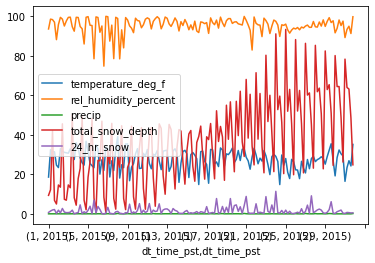

In [41]:
fulldec_df.groupby(by=[fulldec_df['dt_time_pst'].dt.day, fulldec_df['dt_time_pst'].dt.year]).mean().plot()

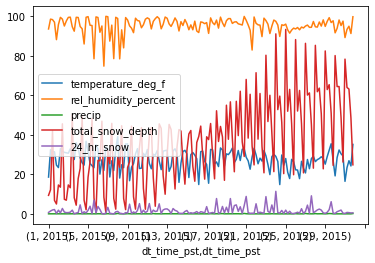

In [42]:
fulldec_df.groupby(by=[fulldec_df['dt_time_pst'].dt.day, fulldec_df['dt_time_pst'].dt.year]).mean().plot()

In [43]:
fulldec_df

,dt_time_pst,temperature_deg_f,rel_humidity_percent,precip,total_snow_depth,24_hr_snow
743,2015-12-01 00:00:00,17.34,93.2,0.01,8.10,0.190
742,2015-12-01 01:00:00,17.22,92.4,0.00,8.10,0.190
741,2015-12-01 02:00:00,17.22,92.1,0.00,8.77,0.190
740,2015-12-01 03:00:00,17.10,92.2,0.01,9.50,0.456
739,2015-12-01 04:00:00,17.10,92.2,0.02,7.77,0.323
...,...,...,...,...,...,...
25790,2019-12-31 19:00:00,37.69,99.4,0.21,24.44,0.450
25789,2019-12-31 20:00:00,40.49,100.0,0.34,21.64,0.450
25788,2019-12-31 21:00:00,41.10,100.0,0.16,21.31,0.450
25787,2019-12-31 22:00:00,41.10,99.2,0.06,21.11,0.317


In [44]:
fulldec_SR_df = fulldec_df.copy(deep=True)
rainmask = fulldec_SR_df['temperature_deg_f'] > 32
snowmask = fulldec_SR_df['temperature_deg_f'] <= 32
fulldec_SR_df['hrly_rain'] = fulldec_SR_df['precip'][rainmask]
fulldec_SR_df['hrly_snow'] = fulldec_SR_df['precip'][snowmask]

fulldec_SR_df['hrly_rain'] = fulldec_SR_df['hrly_rain'].fillna(0)
fulldec_SR_df['hrly_snow'] = fulldec_SR_df['hrly_snow'].fillna(0)

fulldec_SR_df

,dt_time_pst,temperature_deg_f,rel_humidity_percent,precip,total_snow_depth,24_hr_snow,hrly_rain,hrly_snow
743,2015-12-01 00:00:00,17.34,93.2,0.01,8.10,0.190,0.00,0.01
742,2015-12-01 01:00:00,17.22,92.4,0.00,8.10,0.190,0.00,0.00
741,2015-12-01 02:00:00,17.22,92.1,0.00,8.77,0.190,0.00,0.00
740,2015-12-01 03:00:00,17.10,92.2,0.01,9.50,0.456,0.00,0.01
739,2015-12-01 04:00:00,17.10,92.2,0.02,7.77,0.323,0.00,0.02
...,...,...,...,...,...,...,...,...
25790,2019-12-31 19:00:00,37.69,99.4,0.21,24.44,0.450,0.21,0.00
25789,2019-12-31 20:00:00,40.49,100.0,0.34,21.64,0.450,0.34,0.00
25788,2019-12-31 21:00:00,41.10,100.0,0.16,21.31,0.450,0.16,0.00
25787,2019-12-31 22:00:00,41.10,99.2,0.06,21.11,0.317,0.06,0.00


In [159]:
#Null Hypothesis: It rains as much as it snows at this location in December.

rain = fulldec_SR_df['hrly_rain']
snow = fulldec_SR_df['hrly_snow']
#diff_r_s = np.subtract(snow, rain)
alpha = 0.05

precip_results = stats.ttest_rel(rain, snow)
precip_results

ind_results = stats.ttest_ind(snow, rain)
ind_results
print('Dependent samples results:', precip_results, 'Independent results:', ind_results)

Dependent samples results: Ttest_relResult(statistic=-2.163142441950144, pvalue=0.03059372147400685) Independent results: Ttest_indResult(statistic=2.256020541650417, pvalue=0.024098259243132532)


In [157]:
precipdf = fulldec_SR_df[fulldec_SR_df.precip > 0]
precipdf

rain = precipdf['hrly_rain']
snow = precipdf['hrly_snow']
diff_r_s = np.subtract(snow, rain)
alpha = 0.05

precip_results = stats.ttest_rel(rain, snow)
precip_results

Ttest_relResult(statistic=-2.1646919457457687, pvalue=0.030566512748301744)

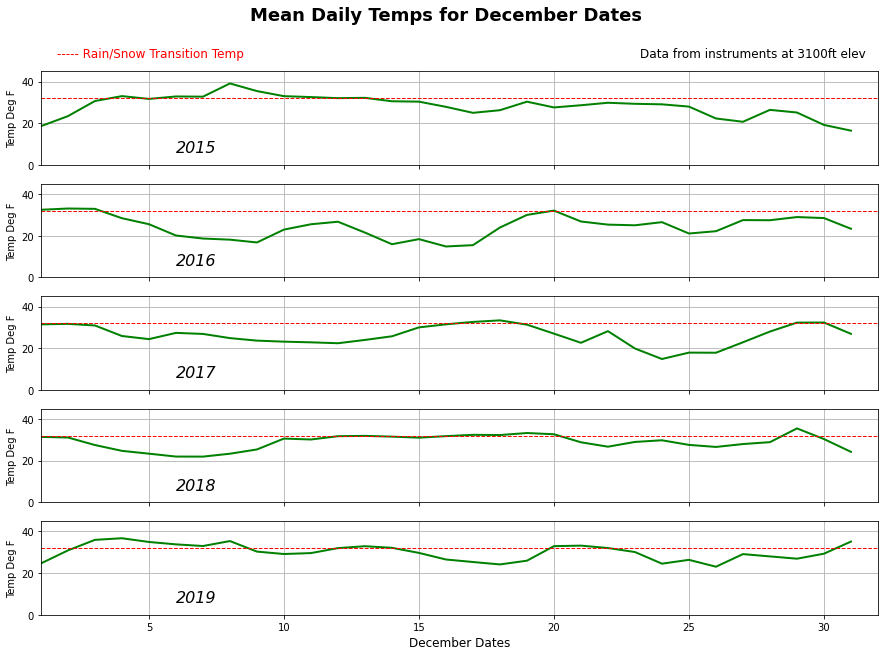

In [137]:
fig, axs = plt.subplots(5,1, figsize = (15, 10), sharex = True, sharey=True)


for i, year in enumerate([2015, 2016, 2017, 2018, 2019]):
    #print(year)
    x = fulldec_df['dt_time_pst'].dt.day.unique()
    yrmask = fulldec_df['dt_time_pst'].dt.year == year
    ymean = fulldec_df[yrmask]['temperature_deg_f'].groupby(fulldec_df['dt_time_pst'].dt.day).mean()
    ymax = fulldec_df[yrmask]['temperature_deg_f'].groupby(fulldec_df['dt_time_pst'].dt.day).max()
    ymin = fulldec_df[yrmask]['temperature_deg_f'].groupby(fulldec_df['dt_time_pst'].dt.day).min()
    
    
    axs[i].set_ylabel('Temp Deg F')
    
    axs[i].plot(x, ymean, color='green', lw=2, label=year)
    axs[i].axis([1,32, 0, 45])
    axs[i].text(6, 6, year, style='italic', fontsize=16)
   
    axs[i].grid()
    axs[i].axhline(32, 0,31, ls='--', lw=1, color='red')
    
axs[4].set_xlabel('December Dates', fontsize=12)    
plt.suptitle('Mean Daily Temps for December Dates',y=0.97,fontsize=18, fontweight='bold')
plt.text(0.14, 0.9, '----- Rain/Snow Transition Temp', fontsize=12, color='red',transform=plt.gcf().transFigure)
plt.text(0.68, 0.9, 'Data from instruments at 3100ft elev', fontsize=12, transform=plt.gcf().transFigure)

plt.savefig('img/meantemps.jpg')

In [21]:
dec15df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2015)]
dec16df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2016)]
dec17df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2017)]
dec18df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2018)]
dec19df = fulldec_df[(fulldec_df['dt_time_pst'].dt.year == 2019)]

In [22]:
dec19df.describe()

,temperature_deg_f,rel_humidity_percent,precip,total_snow_depth,24_hr_snow
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,30.148629,97.733320,0.022621,14.159241,0.831031
std,4.171957,3.114543,0.057297,9.197729,1.575280
min,19.230000,69.250000,0.000000,0.038000,-0.155000
25%,26.770000,96.700000,0.000000,3.722750,0.295000
50%,30.715000,98.700000,0.000000,17.110000,0.435000
75%,33.230000,99.600000,0.020000,21.270000,0.639000
max,41.100000,100.000000,0.430000,31.200000,12.290000


Primary question to answer: Does it rain as much, or more, than it snows during the month of December at the 3100' elevation weather station at Alpental Ski Area?
Null Hypothesis: It snows more than it rains in the month of December.

Information needed: For hourly intervals where precipitation was recorded at amounts of .01 in SWE, or more, was the temperature equal to or below 32F (equating to snow) or temperature above 32 (equating to rain).  Does overall percentage of rain periods for the month exceed snow periods?

Other questions to explore:
Does total snow depth reach target threshold of 30 inches by critical opening date for holiday season?
How often does ski area not open in time to capitalize on holiday season?

In [ ]:
fulldec_depth_df = fulldec_df.copy(deep=True)
#rainmask = fulldec_SR_df['temperature_deg_f'] > 32
#snowmask = fulldec_SR_df['temperature_deg_f'] <= 32


fulldec_SR_df['hrly_rain'] = fulldec_SR_df['hrly_rain'].fillna(0)
fulldec_SR_df['hrly_snow'] = fulldec_SR_df['hrly_snow'].fillna(0)

fulldec_SR_df

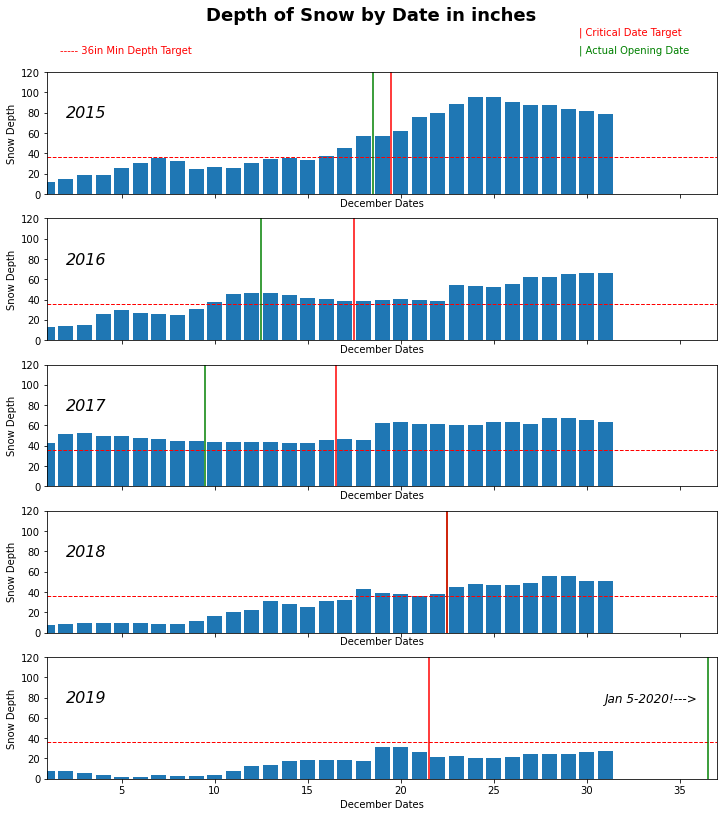

In [139]:
#Represent all dates with day integer plus 0.5 offset so they present between bars for clarity

#Actual opening date for each year at Alpental ski area
Season2015 = 18.5 #'2015-12-18'
Season2016 = 12.5 #'2016-12-12'
Season2017 = 9.5  #'2017-12-09'
Season2018 = 22.5 #'2018-12-22'
Season2019 = 36.5 #'2020-01-05'
seasons = [Season2015, Season2016, Season2017, Season2018, Season2019]

#Critical target date to open for Holiday season(school break begins):

xmas2015 = 19.5 #'2015-12-19'
xmas2016 = 17.5 #'2016-12-17'
xmas2017 = 16.5 #'2017-12-16'
xmas2018 = 22.5 #'2018-12-22'
xmas2019 = 21.5 #'2019-12-21'

crit_dates = [xmas2015, xmas2016, xmas2017, xmas2018, xmas2019]

fig, axs = plt.subplots(5, figsize = (12, 13), sharex=True, sharey=True )

for i, year in enumerate([2015, 2016, 2017, 2018, 2019]):
    #print(year)
    x = fulldec_df['dt_time_pst'].dt.day.unique()
    yrmask = fulldec_df['dt_time_pst'].dt.year == year
    ydepth_max = fulldec_df[yrmask]['total_snow_depth'].groupby(fulldec_df['dt_time_pst'].dt.day).max()
    
    axs[i].bar(x, ydepth_max)
    axs[i].set_ylabel('Snow Depth')
    axs[i].set_xlabel('December Dates')
    axs[i].axhline(36, 0,31, ls='--', lw=1, color='red')
    axs[i].axvline(seasons[i], color='green')
    axs[i].axvline(crit_dates[i], color='red')
    axs[i].text(2, 75, year, style='italic', fontsize=16)
    axs[i].axis([1,37, 0, 120])

axs[4].text(31, 75, 'Jan 5-2020!--->', style='italic', fontsize=12)
plt.suptitle('Depth of Snow by Date in inches',y=0.95,fontsize=18, fontweight='bold')
plt.text(0.14, 0.9, '----- 36in Min Depth Target', fontsize=10, color='red',transform=plt.gcf().transFigure)
plt.text(0.74, 0.92, '| Critical Date Target', fontsize=10, color='red',transform=plt.gcf().transFigure)
plt.text(0.74, 0.9, '| Actual Opening Date', fontsize=10, color='green',transform=plt.gcf().transFigure)

plt.savefig('img/snowdepths.jpg')